In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 6 class csv.csv to 6 class csv.csv


In [6]:
df = pd.read_csv('6 class csv.csv')
print(df)

     Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0               3068          0.002400        0.1700                   16.12   
1               3042          0.000500        0.1542                   16.60   
2               2600          0.000300        0.1020                   18.70   
3               2800          0.000200        0.1600                   16.65   
4               1939          0.000138        0.1030                   20.06   
..               ...               ...           ...                     ...   
235            38940     374830.000000     1356.0000                   -9.93   
236            30839     834042.000000     1194.0000                  -10.63   
237             8829     537493.000000     1423.0000                  -10.73   
238             9235     404940.000000     1112.0000                  -11.23   
239            37882     294903.000000     1783.0000                   -7.80   

     Star type Star color Spectral Clas

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [8]:
df['Star type'].value_counts()

,count
Star type,
0,40
1,40
2,40
3,40
4,40
5,40


In [9]:
df['Star category']=df['Star type'].apply(lambda x:'Brown Dwarf' if x==0 else 'Red Dwarf' if x==1
                                         else 'White Dwarf' if x==2 else 'Main Sequence' if x==3
                                         else 'Supergiant' if x==4 else 'Hypergiant')

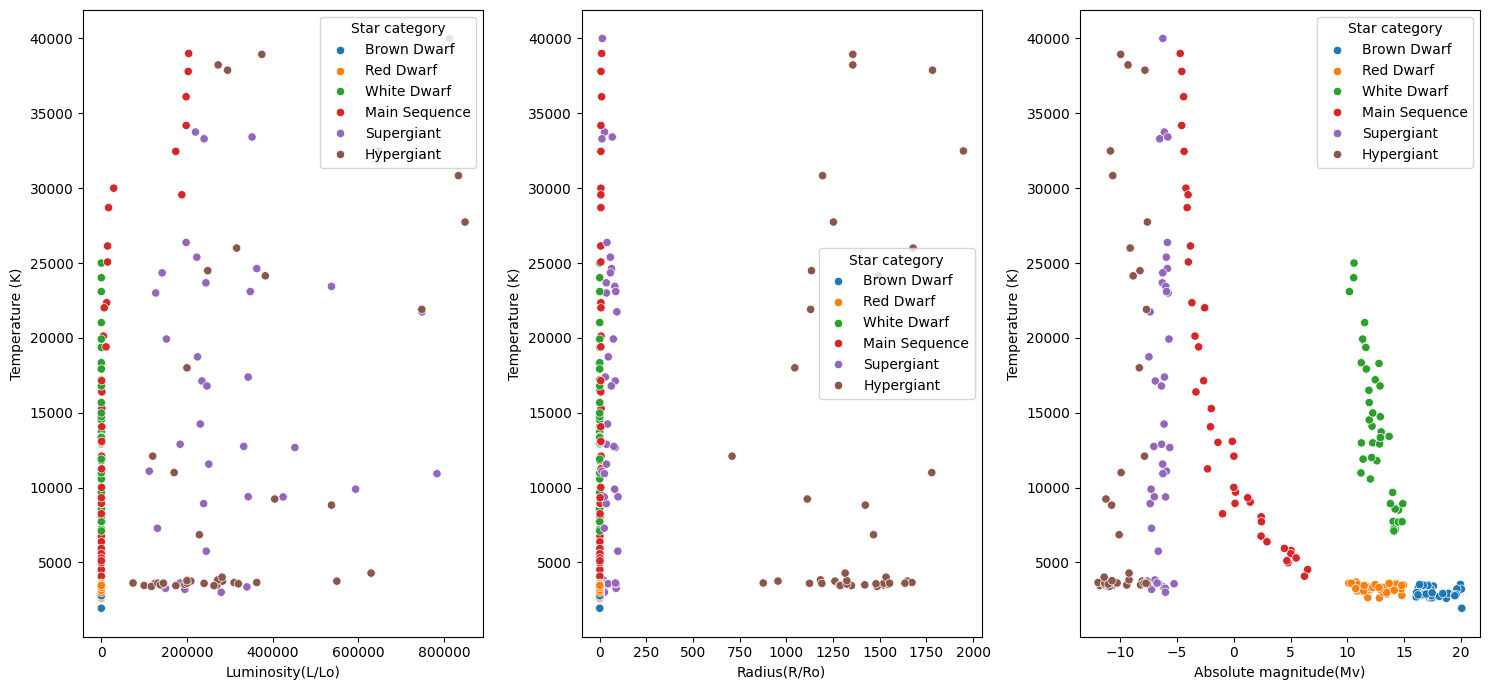

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,axs=plt.subplots(1,3,figsize=(15,7))
sns.scatterplot(data=df,x='Luminosity(L/Lo)',y='Temperature (K)',hue='Star category',ax=axs[0])
sns.scatterplot(data=df,x='Radius(R/Ro)',y='Temperature (K)',hue='Star category',ax=axs[1])
sns.scatterplot(data=df,x='Absolute magnitude(Mv)',y='Temperature (K)',hue='Star category',ax=axs[2])
plt.tight_layout()
plt.show()

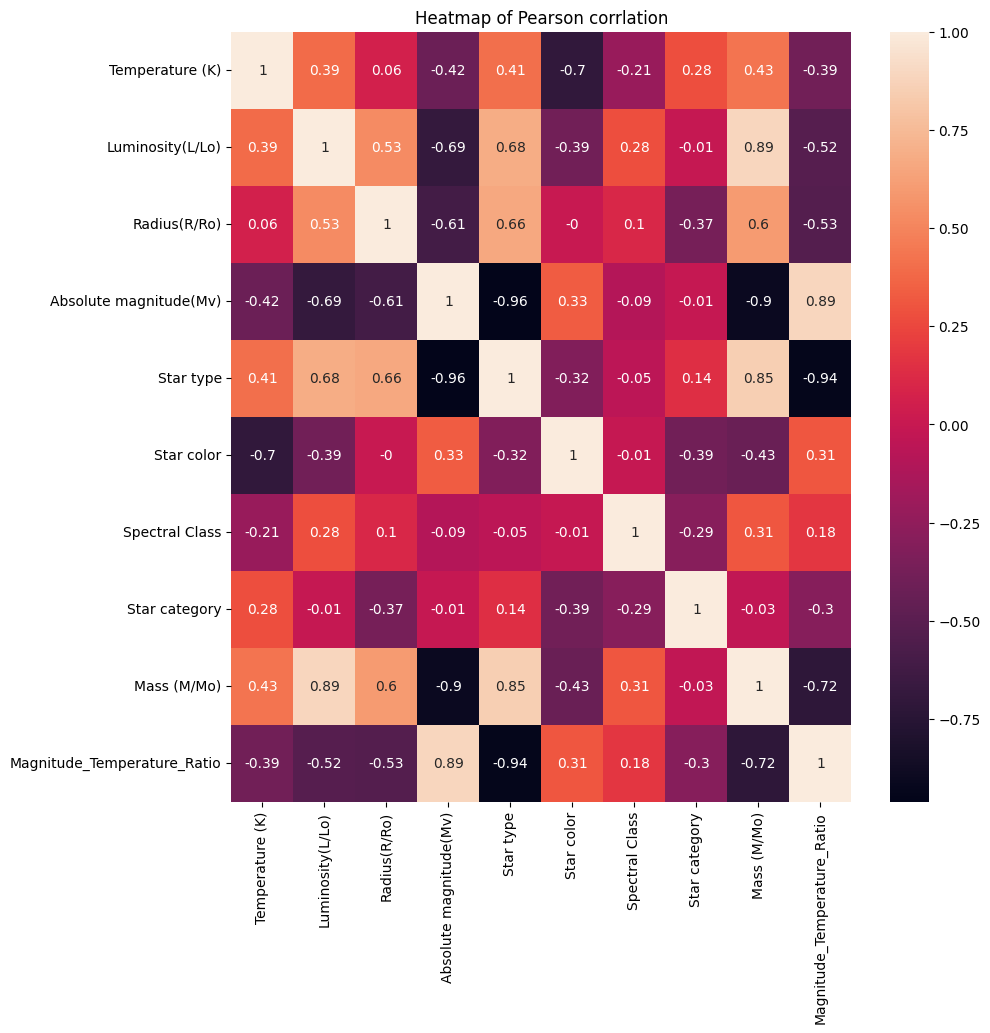

In [20]:
plt.figure(figsize=(10,10))
plt.title('Heatmap of Pearson corrlation')
sns.heatmap(data=round((pd.get_dummies(df)).corr(),2),annot=True);

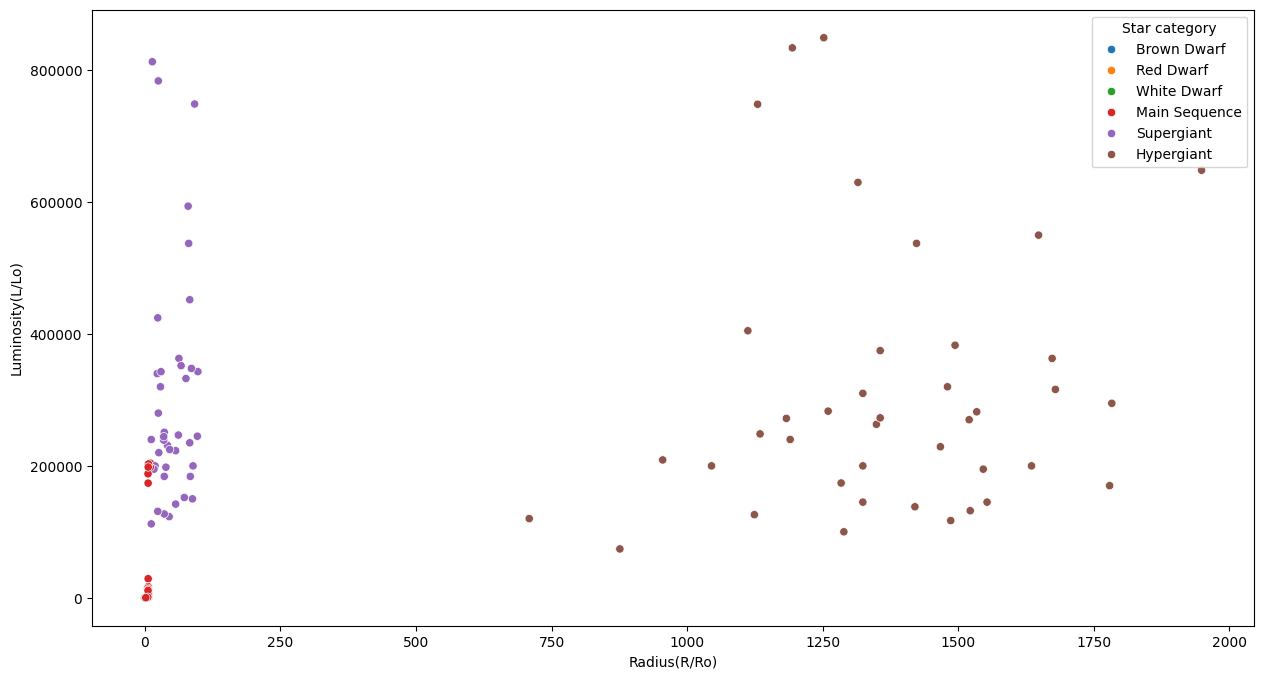

In [12]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='Radius(R/Ro)', y='Luminosity(L/Lo)', hue='Star category')
plt.show()

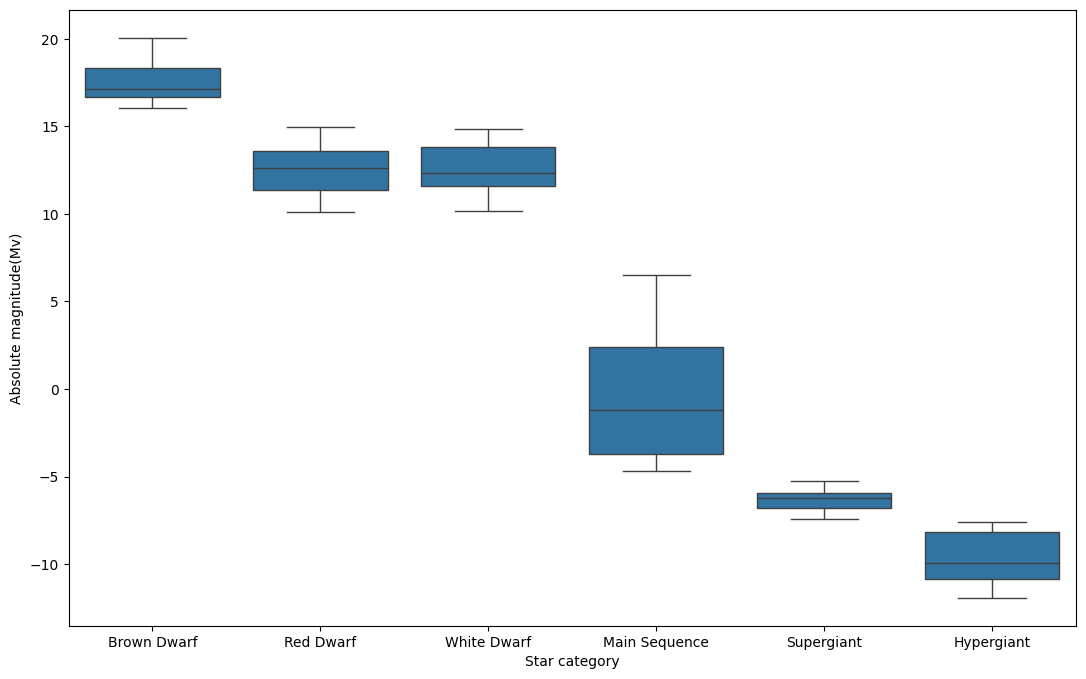

In [13]:
plt.figure(figsize=(13,8))
sns.boxplot(data=df, x='Star category', y='Absolute magnitude(Mv)')
plt.show()

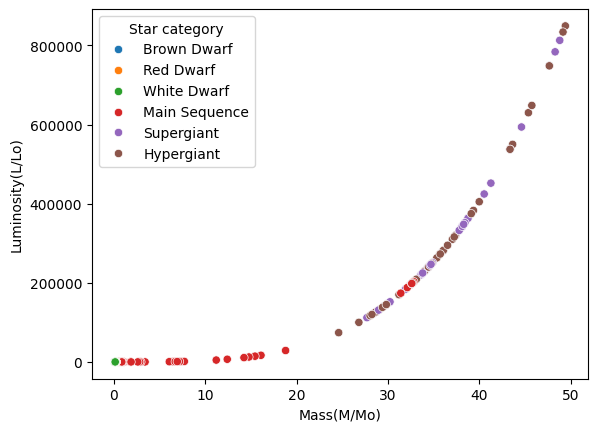

In [14]:
sns.scatterplot(data=df, x=(df['Luminosity(L/Lo)'] ** (1/3.5)), y='Luminosity(L/Lo)', hue='Star category')
plt.xlabel('Mass(M/Mo)')
plt.show()

In [16]:
for col in df.columns[df.dtypes=='object']:
    print(df[col].value_counts(),'\n\n\n')

Star color
Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Yellowish White         3
Blue white              3
white                   3
Orange                  2
Whitish                 2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: count, dtype: int64 



Spectral Class
M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: count, dtype: int64 



Star category
Brown Dwarf      40
Red Dwarf        40
White Dwarf      40
Main Sequence    40
Supergiant       40
Hypergiant       40
Name: count, dtype: int64 





In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns[df.dtypes=='object']:
    df[col]=le.fit_transform(df[col])
df['Mass (M/Mo)']=(df['Luminosity(L/Lo)']**(1/3.5))
from sklearn.feature_selection import mutual_info_classif
t_x=df.drop(columns='Star category')
t_y=df['Star category']
mi=mutual_info_classif(t_x,t_y)
mi_scores_df=pd.DataFrame({'Feature': t_x.columns, 'MI Score':mi})
mi_scores_df=mi_scores_df.sort_values(by='MI Score', ascending=False)
print(mi_scores_df)

                  Feature  MI Score
4               Star type  1.804310
2            Radius(R/Ro)  1.728404
3  Absolute magnitude(Mv)  1.572241
7             Mass (M/Mo)  1.101098
1        Luminosity(L/Lo)  1.084695
5              Star color  0.753221
6          Spectral Class  0.696116
0         Temperature (K)  0.638664


In [18]:
df['Magnitude_Temperature_Ratio']=df['Absolute magnitude(Mv)']/df['Temperature (K)']
mi=mutual_info_classif(df[['Magnitude_Temperature_Ratio']],t_y)
mi_scores_df=pd.DataFrame({'Feature':['Magnitude_Temperature_Ratio'], 'MI Score':mi})
mi_scores_df=mi_scores_df.sort_values(by='MI Score', ascending=False)
print(mi_scores_df)

                       Feature  MI Score
0  Magnitude_Temperature_Ratio  1.485496


In [21]:
df['Radius_Luminosity_Ratio']=(df['Radius(R/Ro)']/df['Luminosity(L/Lo)'])
mi=mutual_info_classif(df[['Radius_Luminosity_Ratio']],t_y)
mi_scores_df=pd.DataFrame({'Feature':['Radius_Luminosity_Ratio'], 'MI Score':mi})
mi_scores_df=mi_scores_df.sort_values(by='MI Score', ascending=False)
print(mi_scores_df)

                   Feature  MI Score
0  Radius_Luminosity_Ratio  1.139594


In [22]:
t_x=df.drop(columns='Star category')
t_y=df['Star category']
mi=mutual_info_classif(t_x,t_y)
mi_scores_df=pd.DataFrame({'Feature': t_x.columns, 'MI Score':mi})
mi_scores_df=mi_scores_df.sort_values(by='MI Score', ascending=False)
print(mi_scores_df)

                       Feature  MI Score
4                    Star type  1.802227
2                 Radius(R/Ro)  1.728057
3       Absolute magnitude(Mv)  1.574423
8  Magnitude_Temperature_Ratio  1.485496
9      Radius_Luminosity_Ratio  1.139594
7                  Mass (M/Mo)  1.097661
1             Luminosity(L/Lo)  1.065965
6               Spectral Class  0.757486
5                   Star color  0.738163
0              Temperature (K)  0.638055


In [23]:
from sklearn.model_selection import train_test_split
x=df.drop(columns='Star category')
y=df['Star category']
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20)
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,f1_score,recall_score

In [24]:
ada=AdaBoostClassifier(algorithm='SAMME')
ada_xt=x_t.copy()
ada_xte=x_te.copy()
ada_yt=y_t.copy()
ada_yte=y_te.copy()
param={'estimator': [DecisionTreeClassifier(max_depth=1),None],
    'learning_rate': np.arange(0.1, 2.01, 0.01),
    'n_estimators': [300]}
nada=RandomizedSearchCV(ada,param_distributions=param,cv=10,n_jobs=-1,random_state=20,scoring='accuracy')
nada.fit(ada_xt,ada_yt)
print(nada.best_params_)
print(nada.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


{'n_estimators': 300, 'learning_rate': np.float64(1.5499999999999994), 'estimator': DecisionTreeClassifier(max_depth=1)}
0.7333333333333334


In [25]:
nada=nada.best_estimator_
pred1_t=nada.predict(ada_xt)
pred1=nada.predict(ada_xte)

In [26]:
dt_xt=x_t.copy()
dt_xte=x_te.copy()
dt_yt=y_t.copy()
dt_yte=y_te.copy()
dt=DecisionTreeClassifier()
path=dt.cost_complexity_pruning_path(dt_xt,dt_yt)
alphas=path.ccp_alphas
param={'ccp_alpha':alphas}
ndt = GridSearchCV(dt, param_grid=param, n_jobs=-1, scoring='accuracy')
ndt.fit(dt_xt,dt_yt)
print(ndt.best_params_)
print(ndt.best_score_)
ba=ndt.best_params_['ccp_alpha']

{'ccp_alpha': np.float64(0.0)}
1.0


In [27]:
dt=DecisionTreeClassifier(ccp_alpha=ba)
param={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,51)),'min_samples_leaf':list(np.arange(1,51)),
       'max_features':['sqrt','log2',None]}
ndt=RandomizedSearchCV(dt,param_distributions=param,cv=10,n_jobs=-1,random_state=20,scoring='accuracy')
ndt.fit(dt_xt,dt_yt)
print(ndt.best_params_)
print(ndt.best_score_)
ndt=ndt.best_estimator_

{'min_samples_split': np.int64(32), 'min_samples_leaf': np.int64(21), 'max_features': None, 'criterion': 'gini'}
1.0


In [28]:
pred2_t=ndt.predict(dt_xt)
pred2=ndt.predict(dt_xte)

In [29]:
rf_xt=x_t.copy()
rf_xte=x_te.copy()
rf_yt=y_t.copy()
rf_yte=y_te.copy()
rf=RandomForestClassifier()
param={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,52)),
       'min_samples_leaf':list(np.arange(1,52)),
       'n_estimators':[400]}
nrf=RandomizedSearchCV(rf,param_distributions=param,n_jobs=-1,random_state=20,cv=10)
nrf.fit(rf_xt,rf_yt)
print(nrf.best_params_)
print(nrf.best_score_)

{'n_estimators': 400, 'min_samples_split': np.int64(36), 'min_samples_leaf': np.int64(14), 'criterion': 'entropy'}
1.0


In [30]:
nrf=nrf.best_estimator_
pred3_t=nrf.predict(rf_xt)
pred3=nrf.predict(rf_xte)

In [31]:
tdf=pd.DataFrame({
    'Classification Algorithms': ['AdaBoost Classifier', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Training Accuracy': [
        accuracy_score(ada_yt, pred1_t),
        accuracy_score(dt_yt, pred2_t),
        accuracy_score(rf_yt, pred3_t)
    ],
    'Training Precision': [
        precision_score(ada_yt, pred1_t, average='weighted', zero_division=0),
        precision_score(dt_yt, pred2_t, average='weighted', zero_division=0),
        precision_score(rf_yt, pred3_t, average='weighted', zero_division=0)
    ],
    'Training Recall': [
        recall_score(ada_yt, pred1_t, average='weighted'),
        recall_score(dt_yt, pred2_t, average='weighted'),
        recall_score(rf_yt, pred3_t, average='weighted')
    ],
    'Training F1 Score': [
        f1_score(ada_yt, pred1_t, average='weighted'),
        f1_score(dt_yt, pred2_t, average='weighted'),
        f1_score(rf_yt, pred3_t, average='weighted')
    ]
})
tdf

,Classification Algorithms,Training Accuracy,Training Precision,Training Recall,Training F1 Score
0,AdaBoost Classifier,0.838889,0.754372,0.838889,0.783453
1,Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000
2,Random Forest Classifier,1.000000,1.000000,1.000000,1.000000


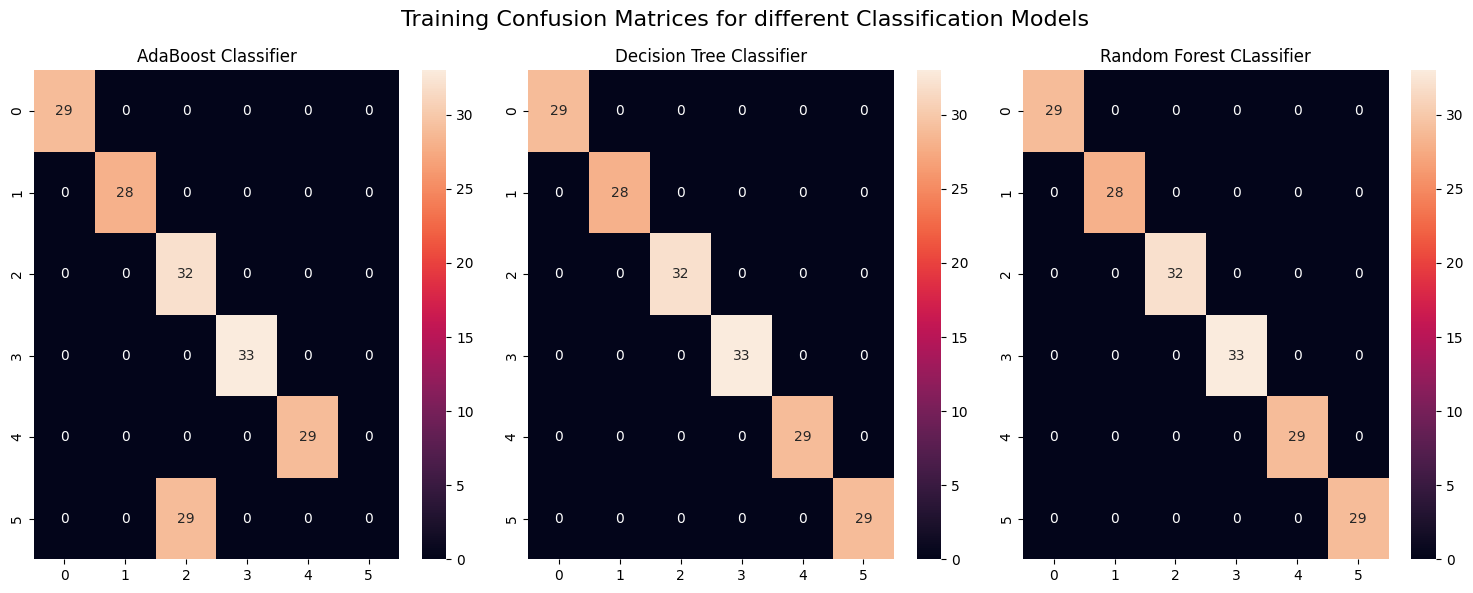

In [32]:
fig,axs=plt.subplots(1,3,figsize=(15,6))
fig.suptitle('Training Confusion Matrices for different Classification Models', fontsize=16)
sns.heatmap(confusion_matrix(ada_yt,pred1_t),annot=True,ax=axs[0])
axs[0].set_title('AdaBoost Classifier')
sns.heatmap(confusion_matrix(dt_yt,pred2_t),annot=True,ax=axs[1])
axs[1].set_title('Decision Tree Classifier')
sns.heatmap(confusion_matrix(dt_yt,pred3_t),annot=True,ax=axs[2])
axs[2].set_title('Random Forest CLassifier')
plt.tight_layout()
plt.show()

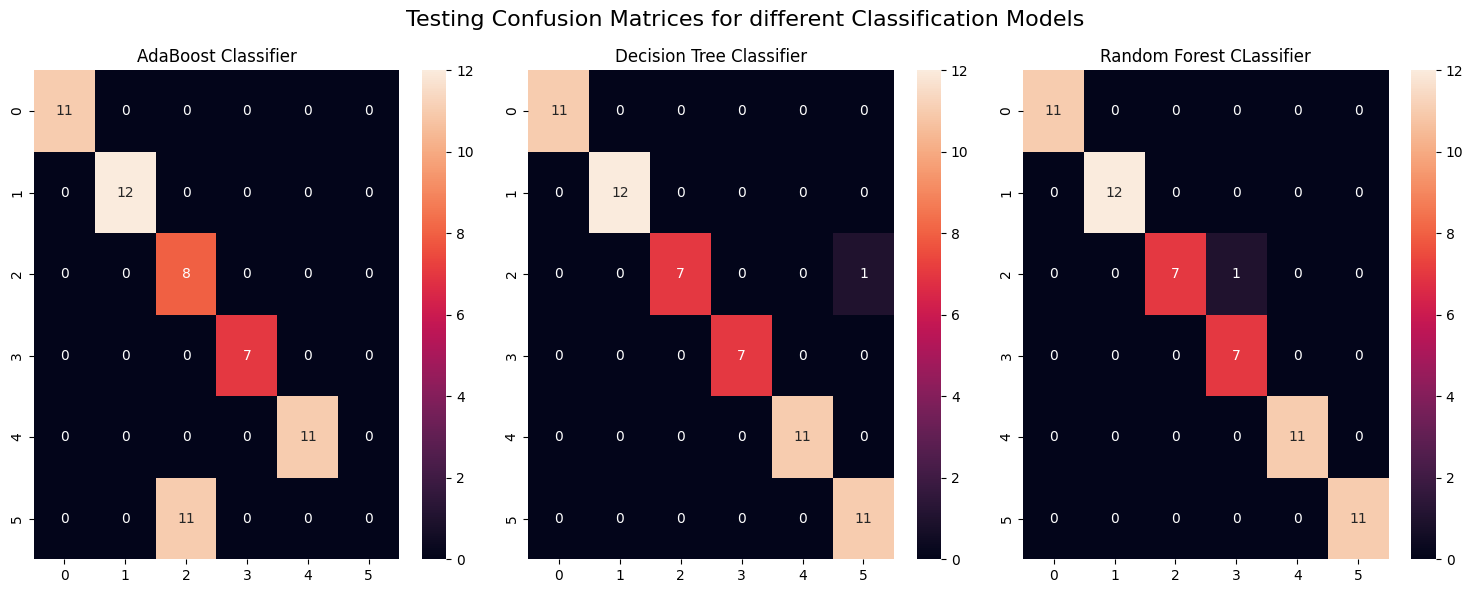

In [33]:
fig,axs=plt.subplots(1,3,figsize=(15,6))
fig.suptitle('Testing Confusion Matrices for different Classification Models', fontsize=16)
sns.heatmap(confusion_matrix(ada_yte,pred1),annot=True,ax=axs[0])
axs[0].set_title('AdaBoost Classifier')
sns.heatmap(confusion_matrix(dt_yte,pred2),annot=True,ax=axs[1])
axs[1].set_title('Decision Tree Classifier')
sns.heatmap(confusion_matrix(dt_yte,pred3),annot=True,ax=axs[2])
axs[2].set_title('Random Forest CLassifier')
plt.tight_layout()
plt.show()